<h1 align="center">DIP - Lab 2</h2>

<h2>Imports and Stuff</h2>

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import copy

#Displays an image
def displayImage(image,max):
    plt.gray()
    plt.imshow(image, vmin=0, vmax=max)
    plt.show()
    plt.axis("off")
    
#Convert float to uint8
def im2int8(image):
    image = image.astype(np.float32)
    image = 255 * image
    image = image.astype(np.uint8)
    return image

#Converts an image to float32
def im2float32(image):
    type = image.dtype
    if np.issubdtype(type, np.integer):
        info = np.iinfo(image.dtype)
        image = image.astype(np.float32) / info.max
    return image

<b>Question 2:</b> Take each of the examples in Table 1, with 16 pixels and 3 bit dynamic range monochrome values, and apply a contrast stretch and histogram equalization modification. Comment on the results. What would you say are the
key differences between a contrast stretch and a histogram equalization?

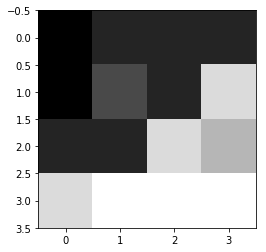

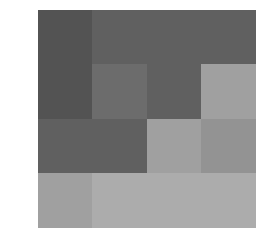

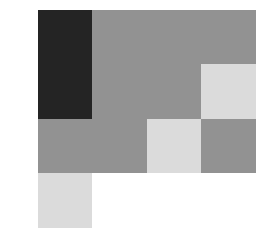

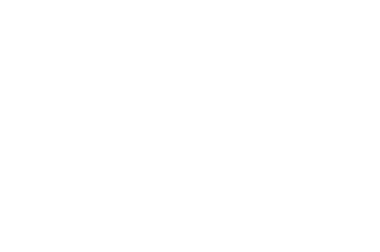

In [110]:
#Initialize Tables
list1 = [[0,1,1,1],[0,2,1,6],[1,1,6,5],[6,7,7,7]]
table1 = np.array(list1)

list2 = [[7,6,5,4],[6,7,5,5],[5,5,6,7],[4,5,7,6]]
table2 = np.array(list2)

list3 = [[2,3,2,3],[3,2,3,5],[3,6,5,6],[6,5,6,5]]
table3 = np.array(list3)

#The piecewise function used to perform the contrast stretch (float32 format)
def contrastStretchFunction(x,pl,ph):
    if x<pl:
        return 0
    elif x>ph:
        return 1
    else:
        return (x-pl)/(ph-pl)
            
#Performs a contrast stretch on a float32 image, taking into account the outliers
def contrastStretch(image):
    q1 = np.percentile(image,25)
    q3 = np.percentile(image,75)
    iqr = q3-q1
    pl = q1-1.5*iqr
    ph = q3+1.5*iqr
    
    for (x,y),value in np.ndenumerate(image):
        image[x,y] = contrastStretchFunction(value,pl,ph)
    return image

#Gets the Histogram of an Image
def getHistogram(image,max):
    histogram,bin_edges = np.histogram(image,max+1)
    
    return histogram

#Gets the probability of each grey level from a histogram
def getProbs(histogram):
    n = sum(histogram)
    probs = histogram/n
    return probs
    
#Get the cumulative probs
def getCumulative(probs):
    return np.cumsum(probs)

#Get new mapping from cumulative distribution
def CDFToMap(cdf,max):
    return np.round(max*cdf)

#Perform Histogram Equalization
def histogramEqualization(image,max):
    histogram = getHistogram(image,max)
    probs = getProbs(histogram)
    cdf = getCumulative(probs)
    myMap = CDFToMap(cdf,max)
    for (x,y),value in np.ndenumerate(image):
        image[x,y] = myMap[value]
    return image

displayImage(table1,7)
table1C = im2float32(copy.deepcopy(table1))
table1H = copy.deepcopy(table1)
displayImage(contrastStretch(table1C),1)
displayImage(histogramEqualization(table1H,7),7)
#displayImage(table2,7)
#displayImage(table3,7)

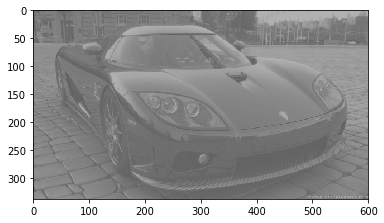

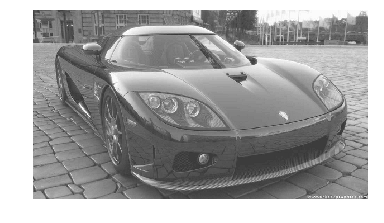

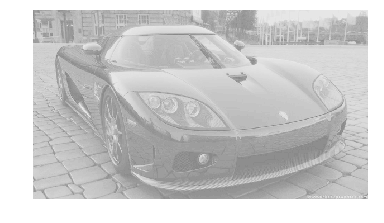

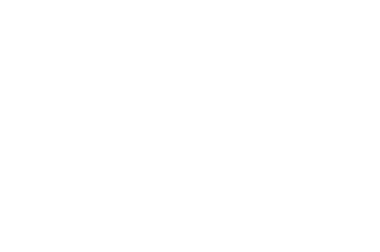

In [109]:
car = plt.imread('car.png')
carC = copy.deepcopy(car)
displayImage(car,1)
carC = contrastStretch(carC)
displayImage(carC,1)
carH = copy.deepcopy(car)
carH = im2int8(carH)
displayImage(histogramEqualization(carH,255),255)